# Categorizing Soccer Teams

*by: Alexander R Kivaisi

FastAi Practical Assignment Project

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: Our case study are five teams; Manchester United, Liverpool, Arsenal, Bayern Munich and Barcelona. All have similar red jersey which makes our problem a fine-grained classification.

In [0]:
from fastai.vision import *

In [0]:
!git clone https://gist.github.com/dc7e60aa487430ea704a8cb3f2c5d6a6.git /tmp/colab_util_repo
!mv /tmp/colab_util_repo/colab_util.py colab_util.py 
!rm -r /tmp/colab_util_repo

Cloning into '/tmp/colab_util_repo'...
remote: Enumerating objects: 40, done.
remote: Total 40 (delta 0), reused 0 (delta 0), pack-reused 40
Unpacking objects: 100% (40/40), done.


In [0]:
!pip install -U -q PyDrive

In [0]:
from colab_util import *
drive_handler = GoogleDriveHandler()

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

This will create a structure of the directory from the Github with the **csv files** 

In [0]:
!rm -r data
!git clone https://github.com/regak/team.git

rm: cannot remove 'data': No such file or directory
Cloning into 'team'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 16 (delta 0), reused 16 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.


Assign each **csv file** into separate variable

In [0]:
path = Path('team/team')

file_manut = 'urls_manut.csv'
file_bayer = 'urls_bayer.csv'
file_barce = 'urls_barce.csv'
file_arsen = 'urls_arsen.csv'
file_liver = 'urls_liver.csv'

## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [0]:
classes = ['manut','arsen','bayer','barce','liver']


We will **loop** accross all five teams csv files and download the images

In [0]:
file_team= ['urls_manut.csv','urls_arsen.csv','urls_bayer.csv','urls_barce.csv','urls_liver.csv']
i=0;
for c in classes:
  folder = c;
  dest = path/folder;
  download_images(path/folder/file_team[i],dest,max_pics=200, max_workers=0)
  i+=1
  

Error https://i2-prod.manchestereveningnews.co.uk/incoming/article8926327.ece/ALTERNATES/s615/JS55990443.jpg HTTPSConnectionPool(host='i2-prod.manchestereveningnews.co.uk', port=443): Read timed out. (read timeout=4)
Error https://i2-prod.manchestereveningnews.co.uk/incoming/article10369540.ece/ALTERNATES/s615/JS74822988.jpg HTTPSConnectionPool(host='i2-prod.manchestereveningnews.co.uk', port=443): Read timed out. (read timeout=4)
Error https://i2-prod.examinerlive.co.uk/incoming/article9909068.ece/ALTERNATES/s615/JS70498619.jpg HTTPSConnectionPool(host='i2-prod.examinerlive.co.uk', port=443): Read timed out. (read timeout=4)
Error https://cdn.primedia.co.za/primedia-broadcasting/image/upload/c_fill,h_289,w_463/m8sthn8khzst0gkcediw HTTPSConnectionPool(host='cdn.primedia.co.za', port=443): Max retries exceeded with url: /primedia-broadcasting/image/upload/c_fill,h_289,w_463/m8sthn8khzst0gkcediw (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (

Error http://dailypost.ng/wp-content/uploads/2017/04/Arsenal-players-vs-City-FA-Cup-Apr2017.jpg HTTPSConnectionPool(host='dailypost.ng', port=443): Read timed out. (read timeout=4)


Error https://cdn.primedia.co.za/primedia-broadcasting/image/upload/c_fill,h_289,w_463/qzfmdcvo7rl7o3sbvozt HTTPSConnectionPool(host='cdn.primedia.co.za', port=443): Max retries exceeded with url: /primedia-broadcasting/image/upload/c_fill,h_289,w_463/qzfmdcvo7rl7o3sbvozt (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))
Error https://cdn.primedia.co.za/primedia-broadcasting/image/upload/c_fill,h_289,w_463/fptwjgqxylfslfbnxbqf HTTPSConnectionPool(host='cdn.primedia.co.za', port=443): Max retries exceeded with url: /primedia-broadcasting/image/upload/c_fill,h_289,w_463/fptwjgqxylfslfbnxbqf (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))
Error https://www.soccer.com/wcm/connect/8bc89762-e06e-4add-9bcc-c3eb49561bb0/2/bayern_team_9798.jpg?MOD=AJPERES&CACHEID=ROOTWORKSPACE-8bc89762-e06e-4add-9bcc-c3eb49561bb0/2-maHimTn HTTPSConnectionPool(host='www.soccer.com', port=443)

Error https://cdn.primedia.co.za/primedia-broadcasting/image/upload/c_fill,h_289,w_463/uevwqfwe3uubzhkxwco9 HTTPSConnectionPool(host='cdn.primedia.co.za', port=443): Max retries exceeded with url: /primedia-broadcasting/image/upload/c_fill,h_289,w_463/uevwqfwe3uubzhkxwco9 (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))


Then we can remove any images that can't be opened:

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

manut


cannot identify image file <_io.BufferedReader name='team/team/manut/00000102.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/manut/00000198.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/manut/00000138.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/manut/00000095.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/manut/00000077.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/manut/00000046.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/manut/00000016.jpg'>
arsen


cannot identify image file <_io.BufferedReader name='team/team/arsen/00000069.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/arsen/00000103.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/arsen/00000085.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/arsen/00000167.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/arsen/00000129.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/arsen/00000039.png'>
cannot identify image file <_io.BufferedReader name='team/team/arsen/00000064.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/arsen/00000153.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/arsen/00000066.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/arsen/00000016.jpg'>
bayer


cannot identify image file <_io.BufferedReader name='team/team/bayer/00000020.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/bayer/00000147.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/bayer/00000124.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/bayer/00000087.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/bayer/00000058.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/bayer/00000136.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/bayer/00000064.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/bayer/00000066.jpg'>
barce


cannot identify image file <_io.BufferedReader name='team/team/barce/00000011.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/barce/00000181.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/barce/00000151.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/barce/00000164.png'>
cannot identify image file <_io.BufferedReader name='team/team/barce/00000086.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/barce/00000038.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/barce/00000170.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/barce/00000042.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/barce/00000128.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/barce/00000062.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/barce/00000187.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/barce/0000010

cannot identify image file <_io.BufferedReader name='team/team/liver/00000060.png'>
cannot identify image file <_io.BufferedReader name='team/team/liver/00000027.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/liver/00000093.png'>
cannot identify image file <_io.BufferedReader name='team/team/liver/00000064.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/liver/00000065.png'>
cannot identify image file <_io.BufferedReader name='team/team/liver/00000150.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/liver/00000094.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/liver/00000137.png'>
cannot identify image file <_io.BufferedReader name='team/team/liver/00000182.jpg'>
cannot identify image file <_io.BufferedReader name='team/team/liver/00000016.jpg'>


## View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [0]:
data.classes

['arsen', 'barce', 'bayer', 'liver', 'manut']

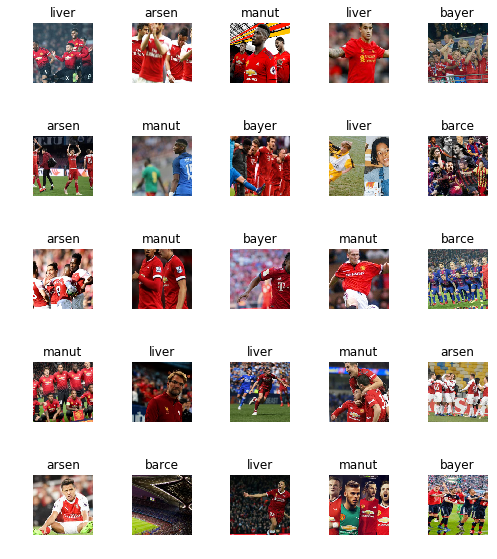

In [0]:
data.show_batch(rows=5, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['arsen', 'barce', 'bayer', 'liver', 'manut'], 5, 742, 185)

## Train model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 76539721.21it/s]


In [0]:
learn.fit_one_cycle(4,1e-3)


epoch,train_loss,valid_loss,error_rate,time
0,1.921668,1.531503,0.670270,00:12
1,1.685581,1.322100,0.529730,00:11
2,1.470601,1.260635,0.486486,00:12
3,1.341722,1.252146,0.486486,00:11


In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1');

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


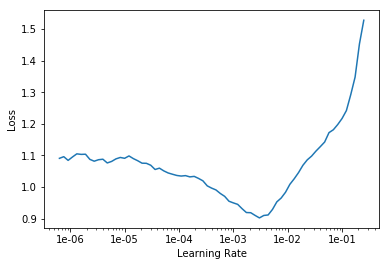

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, 8e-4)

epoch,train_loss,valid_loss,error_rate,time
0,1.124264,1.348056,0.448649,00:11
1,0.978481,1.501352,0.459459,00:12
2,0.821235,1.296958,0.367568,00:12
3,0.683258,1.009620,0.329730,00:13


In [0]:
learn.save('stage-2')

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(8, 8e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.368994,0.892716,0.275676,00:12
1,0.399887,1.284870,0.427027,00:12
2,0.500269,1.707684,0.410811,00:12
3,0.529331,1.313443,0.345946,00:12
4,0.505320,2.042669,0.416216,00:12
5,0.452304,1.062071,0.329730,00:12
6,0.392224,0.882810,0.259459,00:12
7,0.340107,0.858197,0.259459,00:12


In [0]:
learn.save('stage-3')

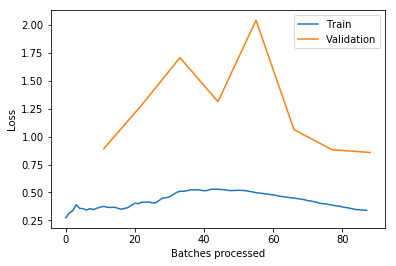

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


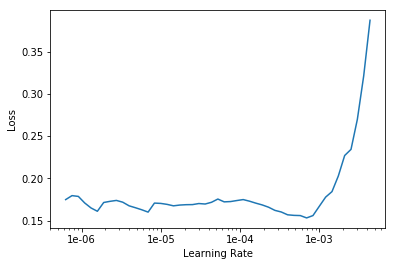

In [0]:
learn.recorder.plot()

In [0]:
learn.load('stage-1');
learn.unfreeze();
learn.fit_one_cycle(20,3e-4)

epoch,train_loss,valid_loss,error_rate,time
0,1.056702,1.235088,0.475676,00:12
1,1.009670,1.145317,0.421622,00:11
2,0.916321,1.076987,0.405405,00:11
3,0.810415,1.000566,0.389189,00:12
4,0.706710,1.028684,0.356757,00:11
5,0.598940,1.265044,0.378378,00:12
6,0.500101,1.072312,0.318919,00:12
7,0.422165,1.009374,0.329730,00:12
8,0.364744,0.962416,0.302703,00:11
9,0.312662,1.147503,0.329730,00:11


In [0]:
learn.save('stage-4')

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


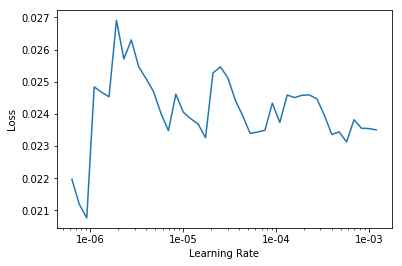

In [0]:
learn.recorder.plot()

## Interpretation

In [0]:
learn.load('stage-4');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

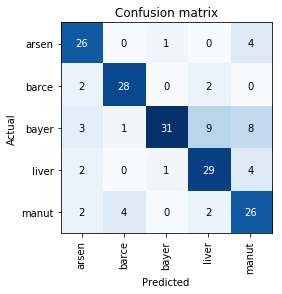

In [0]:
interp.plot_confusion_matrix()

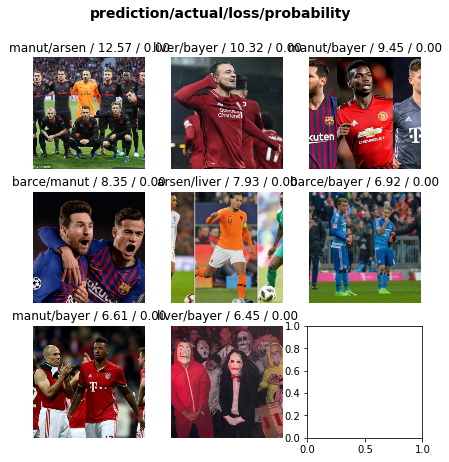

In [0]:
interp.plot_top_losses(8, figsize=(7,7), heatmap=False)

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [0]:
learn.export('team-25.pkl')
path_export = '/content/team/team/team-25.pkl'

'/content/team/team/team-25.pkl'

We will create Folder in our Google drive with name "team_models" and sub-folder name "model_one"

In [0]:
test_folder_id = drive_handler.create_folder('team_models');
test_subfolder_id = drive_handler.create_folder('model_one', parent_path='team_models')


We will then upload the model from path_export and send to our subfolder

In [0]:
drive_handler.upload(path_export, parent_path='team_models/model_one')


'1D2OuhLtZO77VrJgdt_5O18bC9WoFlSDV'

We can view the uploaded model with title name: team-25.pkl

In [0]:
drive_handler.list_folder(test_folder_id, max_depth=1)

[{'children': [{'id': '1D2OuhLtZO77VrJgdt_5O18bC9WoFlSDV',
    'link': 'https://drive.google.com/file/d/1D2OuhLtZO77VrJgdt_5O18bC9WoFlSDV/view?usp=drivesdk',
    'mimeType': 'application/octet-stream',
    'title': 'team-25.pkl'}],
  'id': '192B963vwgOIPwZ0IFdKJMjB6Hw-7LT6b',
  'link': 'https://drive.google.com/drive/folders/192B963vwgOIPwZ0IFdKJMjB6Hw-7LT6b',
  'mimeType': 'application/vnd.google-apps.folder',
  'title': 'model_one'}]

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [0]:
defaults.device = torch.device('cpu')

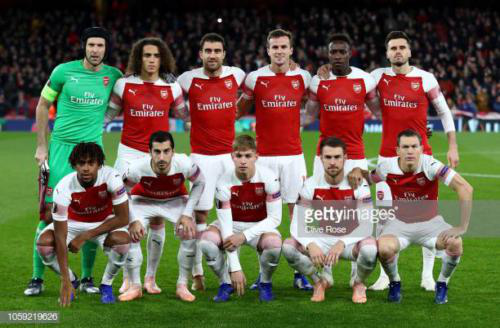

In [0]:
img = open_image(path/'arsen'/'00000021.jpg')
img

We create our `Learner` in production enviromnent like this, jsut make sure that `path` contains the file 'export.pkl' from before.

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category arsen

Other information:
1. The model can be accessed through this link: https://drive.google.com/drive/folders/192B963vwgOIPwZ0IFdKJMjB6Hw-7LT6b

2. Other Dataset for **Tennis vs Badminton Classification** can be cloned from:
https://github.com/regak/BadmintonTennisDatasetv2.git